In [1]:
#导入相关模型
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from cvxopt import matrix, solvers

In [2]:
#导入模拟二分类数据生成模块
from sklearn.datasets._samples_generator import make_blobs
#生成模拟二分类数据集
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 2, cluster_std = 1.2, random_state = 40)

print(X, y)

[[  5.72044382  -3.83154607]
 [  6.19298923  -2.96306716]
 [  6.02026911  -4.29966075]
 [  7.68104481  -1.52963345]
 [ -3.27272955  -9.29071542]
 [ -3.87748102  -9.63624078]
 [  7.22186117  -3.45542124]
 [ -0.5833701   -7.72699871]
 [  5.30082872  -5.6052761 ]
 [  7.242014    -2.18786491]
 [ -1.5236618  -10.98233184]
 [  8.01260591  -2.13067635]
 [  6.98662128  -4.71064609]
 [  6.54380951  -4.60703391]
 [ -3.18073741  -8.91752254]
 [  5.46237524  -5.92775883]
 [ -1.8081873   -7.36551136]
 [  3.22676295  -1.96410563]
 [  4.59913842  -3.82872607]
 [  2.2760133   -4.72812024]
 [  7.88391853  -3.05322682]
 [  6.34849126  -3.25160461]
 [ -3.75196805 -10.0062918 ]
 [  2.2786793   -8.46343855]
 [  6.53836923  -5.75090842]
 [ -4.02248557  -8.64845293]
 [  6.18695905  -4.80285253]
 [  5.7870133   -5.97995283]
 [  6.77467664  -5.16721181]
 [  5.86996669  -4.56612764]
 [  6.26440468  -5.24010406]
 [  6.87502893  -4.90654065]
 [ -2.37208204  -8.300547  ]
 [  6.90252209  -4.01973144]
 [  8.11192302

In [3]:
#将标签转换为1/-1
y_ = y.copy()
y_[y_ == 0] = -1
y_ = y_.astype(float)
y_

array([ 1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.])

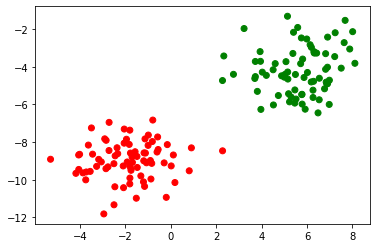

In [4]:
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.3, random_state = 43)
#设置颜色参数
colors = {0:'r', 1:'g'}
#绘制二分类数据集的散点图
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = pd.Series(y).map(colors))
plt.show()

In [5]:
#实现线性可分支持向量机
#硬间隔最大化策略
class Hard_Margin_SVM:
    ###线性可分支持向量机拟合方法
    def fit(self, X, y):
        #训练样本数和特征数
        m, n = X.shape
        
        #初始化二次规划相关变量：P、q、G、h
        self.P = matrix(np.identity(n + 1, dtype = np.float))
        self.q = matrix(np.zeros((n + 1,), dtype = np.float))
        self.G = matrix(np.zeros((m, n + 1), dtype = np.float))
        self.h = -matrix(np.ones((m,), dtype = np.float))
        
        #将数据转为变量
        self.P[0, 0] = 0
        for i in range(m):
            self.G[i, 0] = -y[i]
            self.G[i, 1:] = -X[i, :] * y[i]
        #构建二次规划求解
        sol = solvers.qp(self.P, self.q, self.G, self.h)
        
        #对权重和偏置寻优
        self.w = np.zeros(n, )
        self.b = sol['x'][0]
        for i in range(1, n + 1):
            self.w[i - 1] = sol['x'][i]
        return self.w, self.b
    ###定义模型预测函数
    def predict(self, X):
        return np.sign(np.dot(self.w, X.T) + self.b)

In [6]:
#创建线性可分支持向量机模型实例
hard_margin_svm = Hard_Margin_SVM()
#执行训练
hard_margin_svm.fit(X_train, y_train)
#模型预测
y_pred = hard_margin_svm.predict(X_test)
# print(len(X_test))
# print(len(y_test))
# print(len(y_pred))
# print(y_test, y_pred)
from sklearn.metrics import accuracy_score
#计算测试集上的分类准确率
print('Accuracy:', accuracy_score(y_test, y_pred))

     pcost       dcost       gap    pres   dres
 0:  2.1061e-02  2.0725e+01  3e+02  2e+00  8e+02
 1:  1.7678e-01 -4.0311e+01  5e+01  3e-01  1e+02
 2:  2.5467e-01 -1.3854e+00  2e+00  1e-02  4e+00
 3:  2.1218e-01  4.0205e-02  2e-01  6e-04  2e-01
 4:  1.8309e-01  1.5738e-01  3e-02  8e-05  4e-02
 5:  1.8241e-01  1.8207e-01  3e-04  1e-06  4e-04
 6:  1.8239e-01  1.8239e-01  3e-06  1e-08  4e-06
 7:  1.8239e-01  1.8239e-01  3e-08  1e-10  4e-08
Optimal solution found.
Accuracy: 1.0


C:\Users\hp\AppData\Local\Temp/ipykernel_9032/2783403605.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.P = matrix(np.identity(n + 1, dtype = np.float))
C:\Users\hp\AppData\Local\Temp/ipykernel_9032/2783403605.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.q = matrix(np.zeros((n + 1,), dtype = np.float))
C:\Users\hp\

In [7]:
#导入线性SVM分类模块
from sklearn.svm import LinearSVC
#创建模型实例
clf = LinearSVC(random_state = 0, tol = 1e-5)
#训练
clf.fit(X_train, y_train)
#预测
y_pred = clf.predict(X_test)
#计算测试集上的分类准确率
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0
